In [1]:
import imagehash
import os
import pandas as pd
import matplotlib
import glob
import matplotlib.dates as mdates
import numpy as np
from PIL import Image
from datetime import date, datetime, timedelta
from time import perf_counter
from collections import defaultdict
import matplotlib.pyplot as plt
from multiprocessing import Pool
from itertools import product
from functions5 import *

In [3]:
%%time
F = glob.glob("BLM/Photos/*")
df = pd.DataFrame([(f, f[len("BLM/Photos/*"):-4]) for f in F],
                  columns = ["file", "name"]
                 )

Wall time: 24.2 s


In [7]:
%%time
def parallelize_dataframe(df, func, n_cores=4):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

if __name__ == "__main__":
    df2 = parallelize_dataframe(df, phash_dataframe, 20)

Wall time: 28min 22s


In [8]:
E = pd.concat([pd.read_pickle(f) for f in glob.glob("hashes/*")])
BlackOutTues = ["8000800080008000", "8080808080808080" ]

Logos_phash = ["bfb54962974ad01a", "869a74d6685cc74b", "ea3d2b2d3e6dc0c0"]
Logo_names = ["BLM Logo Black White", "BLM Logo Yellow", "Funding Sources"]

Portraits_phash = ["b3cbcc379368c22c", "f99d1c78b1854ea1",  "b3b3d82d2cc28e2d",]
Portraits_names = ["GF Floral", "GF Original", "GF Pastel", ]

In [6]:
E.phash.value_counts().iloc[:20]

8000000000000000    22518
0000000000000000    21994
8080808080808080     3106
b3cbcc379368c22c     1989
bfb54962974ad01a     1878
8000800080008000     1631
869a74d6685cc74b      678
f99d1c78b1854ea1      531
b3b3d82d2cc28e2d      429
ea3d2b2d3e6dc0c0      366
e9e931bd4652b1c8      366
cccc3333cccc3333      317
9999666699996666      304
9ee055e16a90c9de      279
e598aac7bc2cc532      271
de699661951e6196      270
8080008000800080      248
aaaaaaaaaaaaaaaa      214
af9be2f03c98e4c0      204
e798aac7bc0cc532      202
Name: phash, dtype: int64

In [10]:
%%time
E["date"] = E.name.apply(lambda x: x.split("=")[1][:10])
E.date = pd.to_datetime(E.date)
E["datetime"] = E.name.apply(lambda x: x.split("=")[1][:19])
E.datetime = pd.to_datetime(E.datetime,format = "%Y-%m-%d_%H-%M-%S")
E.datetime = E.datetime.dt.round("2H")

Wall time: 5.73 s


In [12]:
matplotlib.style.use("seaborn-white")

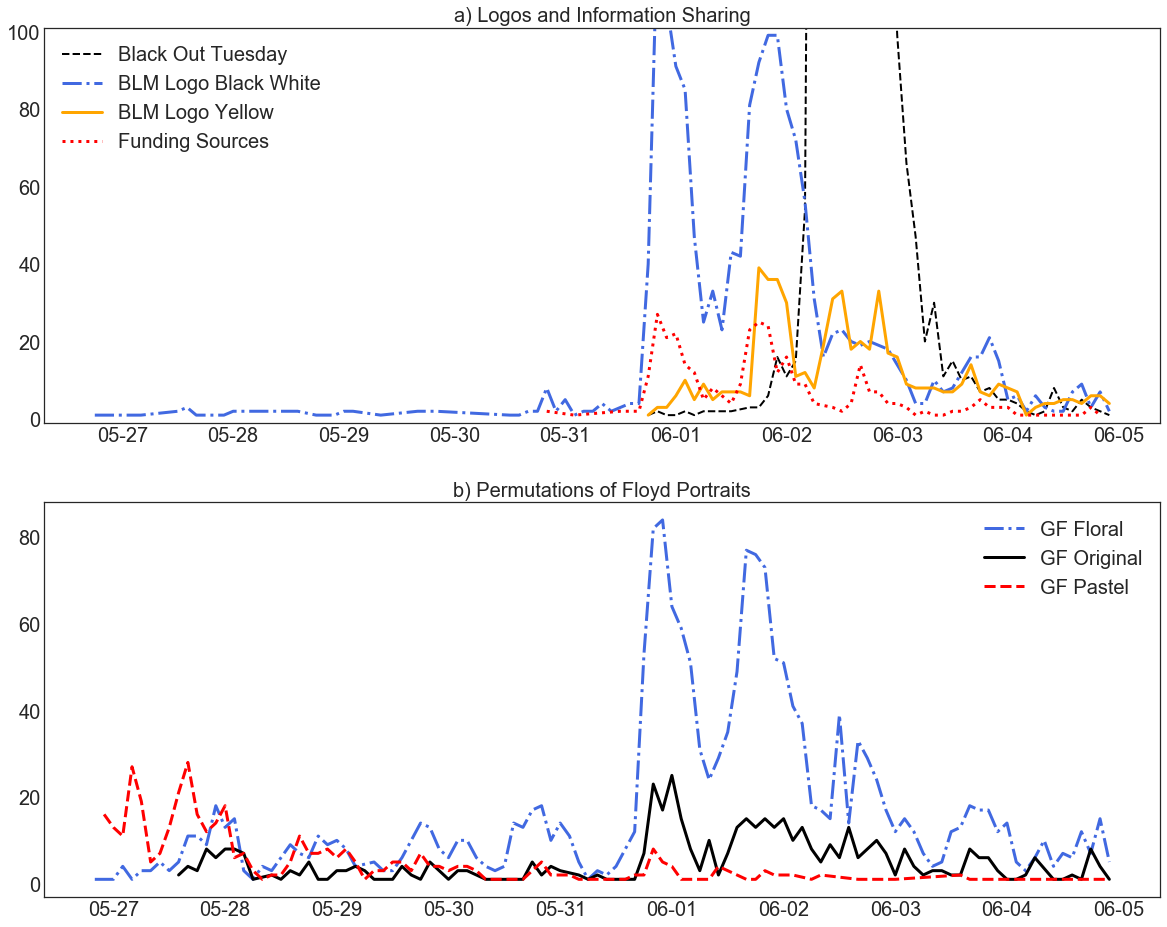

In [18]:
plt.figure(figsize=(20,16))


plt.subplot(2,1,1)

T = E[E.phash.isin(BlackOutTues)]
T = T.datetime.value_counts().sort_index()
T = T[(T.index > "2020-05-25") & (T.index < "2020-06-5")]
plt.plot(T.index, T.values, label = "Black Out Tuesday", color = "black", linewidth = 2, linestyle = "dashed")

colors = ["royalblue", "orange", "red"]
styles = ["dashdot", "solid", "dotted"]

for i, phash in enumerate(Logos_phash):
    T = E[E.phash == phash]
    T = T.datetime.value_counts().sort_index()
    T = T[(T.index > "2020-05-25") & (T.index < "2020-06-5")]
    plt.plot(T.index, T.values, label = Logo_names[i], color = colors[i], linestyle = styles[i], linewidth=3)
plt.legend(fontsize=20)
# plt.xlim("2020-05-25", "2020-06-10")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
dtFmt = mdates.DateFormatter('%m-%d') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.ylim(-1,101)
plt.title("a) Logos and Information Sharing", fontsize= 20)

plt.subplot(2,1,2)
colors = ["royalblue", "black", "red"]
styles = ["dashdot", "solid", "dashed"]
for i, phash in enumerate(Portraits_phash):
    T = E[E.phash == phash]
    T = T.datetime.value_counts().sort_index()
    T = T[(T.index > "2020-05-25") & (T.index < "2020-06-5")]
    plt.plot(T.index, T.values, label = Portraits_names[i], color = colors[i], linestyle = styles[i], linewidth=3)
plt.legend(fontsize=20)
# plt.xlim("2020-05-25", "2020-06-10")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
dtFmt = mdates.DateFormatter('%m-%d') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.title("b) Permutations of Floyd Portraits", fontsize= 20)

plt.savefig("figures/Visual_Diffusion.png")

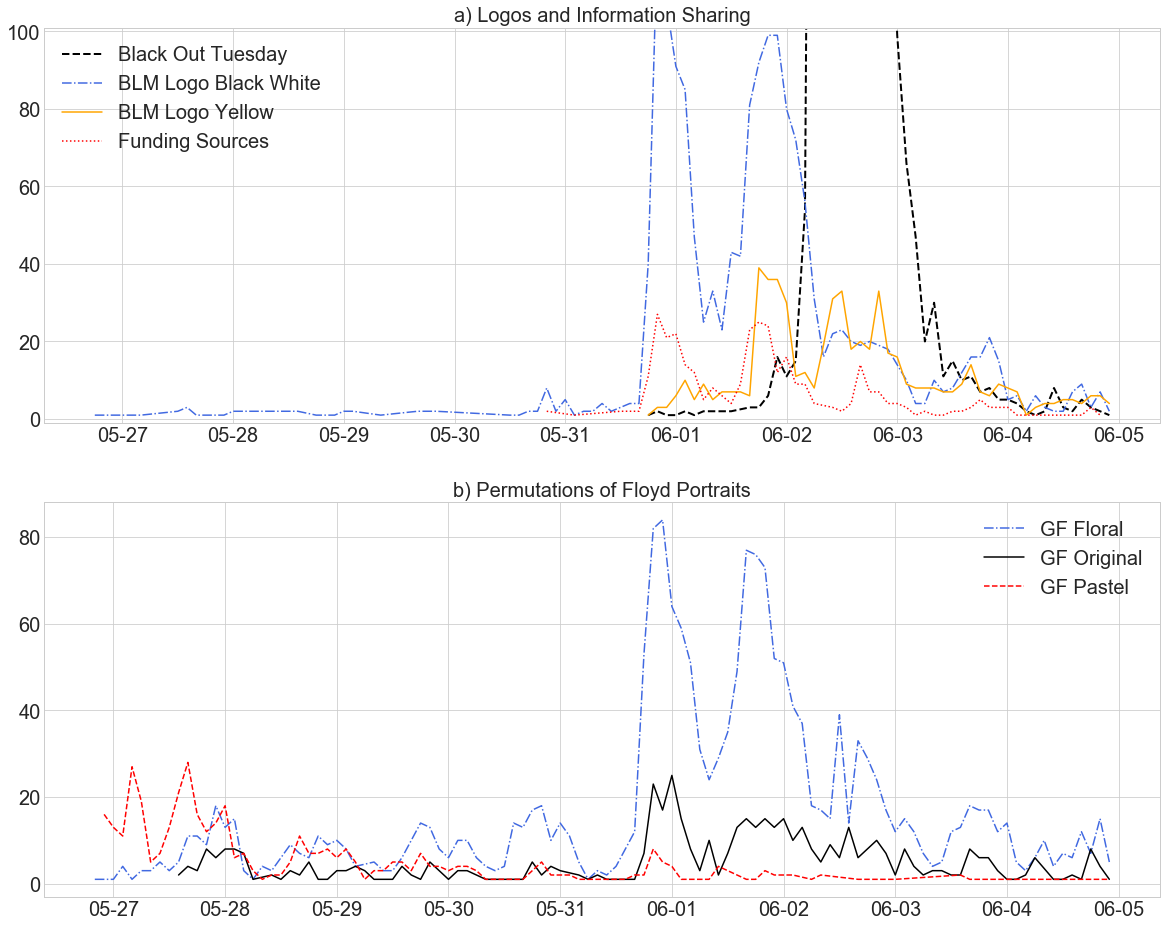

In [151]:
plt.figure(figsize=(20,16))


plt.subplot(2,1,1)

T = E[E.phash.isin(BlackOutTues)]
T = T.datetime.value_counts().sort_index()
T = T[(T.index > "2020-05-25") & (T.index < "2020-06-5")]
plt.plot(T.index, T.values, label = "Black Out Tuesday", color = "black", linewidth = 2, linestyle = "dashed")

colors = ["royalblue", "orange", "red"]
styles = ["dashdot", "solid", "dotted"]

for i, phash in enumerate(Logos_phash):
    T = E[E.phash == phash]
    T = T.datetime.value_counts().sort_index()
    T = T[(T.index > "2020-05-25") & (T.index < "2020-06-5")]
    plt.plot(T.index, T.values, label = Logo_names[i], color = colors[i], linestyle = styles[i])
plt.legend(fontsize=20)
# plt.xlim("2020-05-25", "2020-06-10")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
dtFmt = mdates.DateFormatter('%m-%d') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.ylim(-1,101)
plt.title("a) Logos and Information Sharing", fontsize= 20)

plt.subplot(2,1,2)
colors = ["royalblue", "black", "red"]
styles = ["dashdot", "solid", "dashed"]
for i, phash in enumerate(Portraits_phash):
    T = E[E.phash == phash]
    T = T.datetime.value_counts().sort_index()
    T = T[(T.index > "2020-05-25") & (T.index < "2020-06-5")]
    plt.plot(T.index, T.values, label = Portraits_names[i], color = colors[i], linestyle = styles[i])
plt.legend(fontsize=20)
# plt.xlim("2020-05-25", "2020-06-10")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
dtFmt = mdates.DateFormatter('%m-%d') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt)
plt.title("b) Permutations of Floyd Portraits", fontsize= 20)

plt.savefig("figures/Visual_Diffusion.png")

In [ ]:
def get_hashes(path):
    hashfunc = imagehash.phash
    failed = []
    total = 0
    success = 0
    image_filenames = []
    image_filenames += [file for file in os.listdir(path)]
    images = {}
    for img in image_filenames:
        if img.split(".")[-1] in ["jpg", "jpeg", "png"]:
            try:
                phash = hashfunc(Image.open(os.path.join(path, img)).convert("RGBA"))
                images[img] = str(phash)
                success +=1
            except Exception:
                failed.append(img)
                continue
            total +=1
    print("phash generated for {} of {} images".format(success, total))
    return images